<a href="https://colab.research.google.com/github/nebulia37/dl-models-from-first-principles/blob/main/01_linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import torch
from d2l import torch as d2l

In [ ]:
def synthetic_data(w, b, num_examples):
  X = torch.normal(0,1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print('features:', features.shape, "\n label:", labels[0])

features: torch.Size([1000, 2]) 
 label: tensor([4.7058])


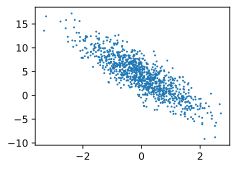

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),
                labels.detach().numpy(),1)

In [ ]:
# create data iteration to get batch_size data point at one time randomly
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
  print(X, "\n", y)
  break


tensor([[-2.1892,  1.0905],
        [-0.6908, -0.5297],
        [ 1.0172,  0.9259],
        [ 0.2019,  1.0681],
        [-0.6879, -0.2144],
        [-2.1595, -0.0747],
        [-0.3543,  1.6833],
        [ 0.6424,  2.2972],
        [-1.4715,  0.8015],
        [ 0.8649,  1.8309]]) 
 tensor([[-3.8977],
        [ 4.6222],
        [ 3.0751],
        [ 0.9605],
        [ 3.5411],
        [ 0.1285],
        [-2.2431],
        [-2.3154],
        [-1.4611],
        [-0.2938]])


In [ ]:
# define initial parameters
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
# define model
def linreg(X, w, b):
  return torch.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2/2

In [ ]:
# updata parameters
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

In [ ]:
# tranin
lr = 0.03
num_epochs = 3 # scan data 3 times
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y) # net(X,w,b) calculate predict value, calculate the loss
    l.sum().backward() # loss sum, calculate gradient
    sgd([w, b], lr, batch_size) # use the gradient to update parameter
  with torch.no_grad(): # print loss, no need to calculate grad
    train_1 = loss(net(features, w, b), labels)
    print(f'epoch {epoch+1}, loss {float(train_1.mean()):.6f}')


epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000048
